**Hw Week 1**

Name: Christopher Morris
Section: 02

(Side note: For the graphs I have yet to get the labels working for my computer, I will go talk with 
Professor McMillan on why AMUSE may be interferring with this. 

**HW Question 1**: Program was made to test a user-made sin function versus the python math implemented sin function.

In [34]:

def factorial(x):
    if x == 1:
        return x
    else:
        x *= factorial(x-1)
    return x


def sin(x):
    i = 0 
    val = 0 
    while True:
        temp = pow(-1,i) * pow(x, 2*i + 1) / factorial(2*i + 1)
        if abs(temp) < 10e-6:
            return val
        val += temp
        i += 1
print('1B) Results for user-made sin function:')
print('sin(.1) =', sin(.1))
print('sin(1) =', sin(1))
print('sin(10) =', sin(10))
print('sin(35) =', sin(35))        

1B) Results for user-made sin function:
sin(.1) = 0.09983333333333334
sin(1) = 0.841468253968254
sin(10) = -0.5440121136494102
sin(35) = -0.4344140352098325


In [35]:
import math as math 

print('1C) Results for python implemented sin function:')
print('sin(.1) =', math.sin(.1),'which is', math.sin(.1) - sin(.1), 'off.')
print('sin(1) =', math.sin(1),'which is', math.sin(1) - sin(1), 'off.' )
print('sin(10) =', math.sin(10),'which is', math.sin(10) - sin(10), 'off.')
print('sin(35) =', math.sin(35),'which is', math.sin(35) - sin(35), 'off.')

1C) Results for python implemented sin function:
sin(.1) = 0.09983341664682815 which is 8.331349481138783e-08 off.
sin(1) = 0.8414709848078965 which is 2.7308396425285153e-06 off.
sin(10) = -0.5440211108893699 which is -8.997239959729342e-06 off.
sin(35) = -0.428182669496151 which is 0.0062313657136814915 off.


In [36]:
def sin(x):
    i = 0 
    val = 0 
    while True:
        temp = pow(-1,i) * pow(x, 2*i + 1) / math.factorial(2*i + 1)
        if abs(temp) < 10e-6:
            return val
        val += temp
        i += 1

print('1D) user-made using math.factorial sin(45) =', sin(45))
print('python implemented sin(45) =', math.sin(45))


1D) user-made using math.factorial sin(45) = 37.93452679254748
python implemented sin(45) = 0.8509035245341184


The user-made sin(45) blows up to a over 37.93 which implies it is increasing towards infinity which diverges from the real value of the sin function. This is probably due to the factorial function decreasing rapidly and thus drastically increasing the overall fraction and overloading the computer's memory, forcing it to compensate. 


**Hw Question 2**: Program to test a user-made fourier step-function based on user-inputed x-values and the number of summations (n).

In [37]:
import numpy as np
import matplotlib.pyplot as plt 

def fourier(x, n):
    value = 0
    for n in range(1,n+1):
        value += (2/np.pi) * (1 - (-1)**n) * np.sin(n*x) / n
    return value 

deltax = math.pi / 500
xvals = np.arange(0, math.pi+deltax, deltax)

2A & 2B)User Made Fourier Step Function from zero to pi.
The black line indicates how the step function should look overall with a great enough summations (n).


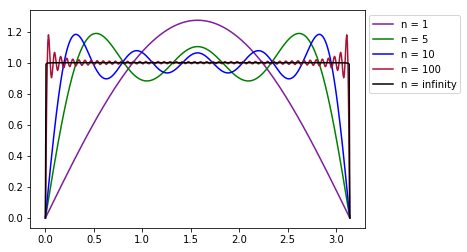

In [38]:
plt.plot(xvals, fourier(xvals, 1), 'xkcd:purple', label='n = 1')
plt.plot(xvals, fourier(xvals, 5), 'g', label='n = 5')
plt.plot(xvals, fourier(xvals, 10), 'b',label='n = 10')
plt.plot(xvals, fourier(xvals, 100), 'xkcd:rouge',label='n = 100')
plt.plot(xvals, fourier(xvals, 10000),'k',label='n = infinity')

plt.legend()
plt.legend(bbox_to_anchor=(1.3,1))
print('2A & 2B)User Made Fourier Step Function from zero to pi.')
print('The black line indicates how the step function should look overall with a great enough summations (n).')

**Hw Question 3**: Program used to numerically calculate the time value in which a particle in one dimension returns back to its initial position as well as a graph of the particle.

2A) The final time calulcated numerically for x (when dt is .05) to return to 0 is: 1.4000000000000006
The analyitic solution calculated for x to return to 0 is: 1.33
The numeric solution is about .7 away from the analytic solution.
2B) Graph of position vs time (red), and the point in which the position returns to zero (black)


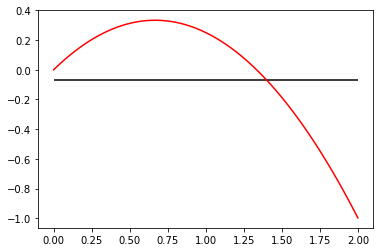

In [39]:
x0 = 0 
v0 = 1
a = -1.5
dt = 0.05

def get_position(t):
    return x0 + v0*t + .5*a*t*t

def get_final_time(x0, v0, a, dt):
    x = x0 
    v = v0
    t = 0 
    while not x < 0:
        x += v*dt
        v += a*dt 
        t += dt 
    return t 
    
tvals = np.arange(0,2,.001)
plt.plot(tvals, get_position(tvals),'r')
final = get_final_time(x0, v0, a, dt)
print('2A) The final time calulcated numerically for x (when dt is .05) to return to 0 is:', final)
print('The analyitic solution calculated for x to return to 0 is:', round(2/(1.5),2))
print('The numeric solution is about .7 away from the analytic solution.')
plt.hlines(get_position(final), 0, 2)

print('2B) Graph of position vs time (red), and the point in which the position returns to zero (black)')

**Not part of the official homework set**

This is included to show the increase in the accuracy by decreasing the time-step.


The final time calulcated numerically for x (when dt is .001) to return to 0 is: 1.3349999999999638
The analyitic solution calculated for x to return to 0 is: 1.33
The difference between the analytic and numerical answers are significanly less because of the decreased timestep.


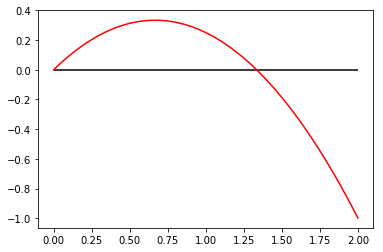

In [40]:
plt.plot(tvals, get_position(tvals),'r')
final = get_final_time(x0, v0, a, .001)
print('The final time calulcated numerically for x (when dt is .001) to return to 0 is:', final)
print('The analyitic solution calculated for x to return to 0 is:', round(2/(1.5),2))
print('The difference between the analytic and numerical answers are significanly less because of the decreased timestep.')
plt.hlines(get_position(final), 0, 2)